In [26]:
# Libraries and initial configuration
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import cv2
from torchvision import transforms
import os
import random
from PIL import Image
import torch


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Preparation and Data analysis


*   Exploratory analysis of Data




In [2]:
# Data load
df_poi = pd.read_csv('/content/drive/MyDrive/Bootcamp/Deep Learning/Proyecto/poi_dataset.csv')
# visualize first rows
print(df_poi.shape)
df_poi.head(5)

(1569, 14)


,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"['Escultura', 'Pintura']",1,2.642262,39.572694,[],500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","['Patrimonio', 'Historia']",1,-3.704467,40.423037,[],500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","['Ciencia', 'Patrimonio']",2,-3.699694,40.442045,[],250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",['Cultura'],1,-3.691228,40.427256,[],500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","['Patrimonio', 'Cultura']",1,-3.727822,40.439665,[],500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...


In [3]:
df_poi.dtypes


,0
id,object
name,object
shortDescription,object
categories,object
tier,int64
locationLon,float64
locationLat,float64
tags,object
xps,int64
Visits,int64


In [4]:
df_poi.describe()

,tier,locationLon,locationLat,xps,Visits,Likes,Dislikes,Bookmarks
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,1.541109,-1.132337,39.900141,750.382409,10011.943276,3623.908222,2526.305927,973.261950
std,0.637677,22.733401,9.662134,228.319854,5.456808,4817.879374,2225.543360,1453.333948
min,1.000000,-121.951049,-62.940930,0.000000,10001.000000,100.000000,52.000000,50.000000
25%,1.000000,-3.725292,40.411754,600.000000,10008.000000,464.000000,937.000000,116.000000
50%,1.000000,-3.699140,40.421738,700.000000,10011.000000,1434.000000,2718.000000,306.000000
75%,2.000000,-3.673348,40.472458,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000
max,4.000000,158.333118,65.706572,1000.000000,10038.000000,26425.000000,10999.000000,8157.000000


In [5]:
df_poi.isnull().sum()

,0
id,0
name,0
shortDescription,0
categories,0
tier,0
locationLon,0
locationLat,0
tags,0
xps,0
Visits,0


There are no null values in the data set but there are some empty lists in features 'tags' and 'categories'.

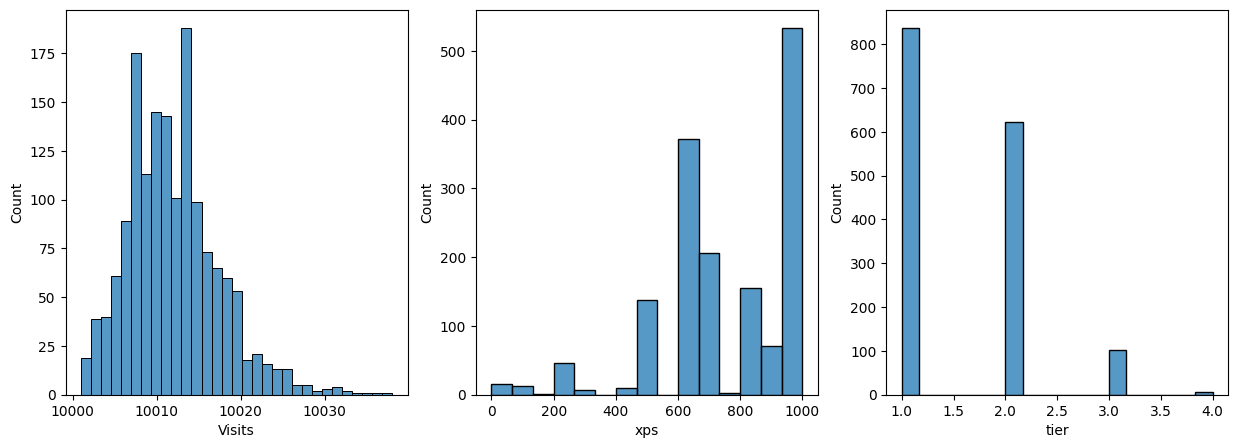

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_poi['Visits'], ax=ax[0])
sns.histplot(df_poi['xps'], ax=ax[1])
sns.histplot(df_poi['tier'], ax=ax[2])
plt.show()

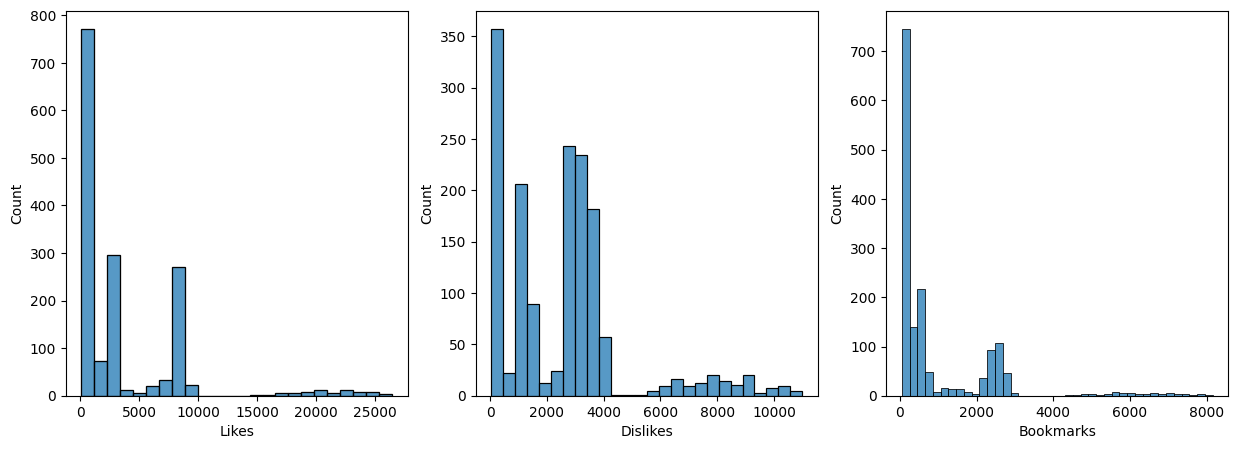

In [7]:
# Analyzing distribution of Likes, Dislikes and Bookmarks
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_poi['Likes'], ax=ax[0])
sns.histplot(df_poi['Dislikes'], ax=ax[1])
sns.histplot(df_poi['Bookmarks'], ax=ax[2])
plt.show()

By these graphs, it can be seen that trends are around certain number of likes, dislikes and bookmarks and then there few poi with very high number of likes, dislikes and bookmarks. These might correspond to more popular sites.

### Procesing of categorical variables
First we have to convert from object to list because the content of 'categories' and 'tags' is a mix of several elements.

Then we have to input values for the empty lists,

Finally encode both columns in a way that information would be usefull for the model.


In [8]:
# transform content to lists
df_poi['categories'] = df_poi['categories'].apply(eval)
df_poi['tags'] = df_poi['tags'].apply(eval)

type(df_poi['categories'][0])

list

In [9]:
# count number of elements per list
df_poi.categories.apply(len).value_counts()

,count
categories,
3,1073
4,325
2,106
1,63
0,2


In [10]:
# Visualize and manage 2 empty lists
empty_rows = df_poi[df_poi['categories'].str.len() == 0]
empty_rows

,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
24,e8cff95b-b4dd-46fd-82cc-800966e4b575,Teatro de la Zarzuela,"El Teatro de la Zarzuela, emblema cultural de ...",[],2,-3.696890,40.417202,[],500,10011,3057,1242,624,data_main/e8cff95b-b4dd-46fd-82cc-800966e4b575...
26,4b290ed0-94a4-40f1-9b5c-e11c1a4bc950,Teatro María Guerrero,"El Teatro María Guerrero, situado en Madrid, e...",[],1,-3.692992,40.422884,[],500,10015,760,3022,133,data_main/4b290ed0-94a4-40f1-9b5c-e11c1a4bc950...


The two missing categories with [], are theatres, so we are going to manually imput the categories as 'Cultura' and 'Ocio'

In [11]:
for idx in empty_rows.index:
    df_poi.at[idx, 'categories'] = ['Cultura', 'Ocio']
    print(df_poi.loc[idx, 'categories'])

['Cultura', 'Ocio']
['Cultura', 'Ocio']


In [12]:
df_poi.loc[24]

,24
id,e8cff95b-b4dd-46fd-82cc-800966e4b575
name,Teatro de la Zarzuela
shortDescription,"El Teatro de la Zarzuela, emblema cultural de ..."
categories,"[Cultura, Ocio]"
tier,2
locationLon,-3.69689
locationLat,40.417202
tags,[]
xps,500
Visits,10011


In [13]:
# Number of unique categories

all_categories = set(cat for sublist in df_poi['categories'] for cat in sublist)
print(all_categories)


{'Patrimonio', 'Ocio', 'Escultura', 'Arquitectura', 'Ciencia', 'Gastronomía', 'Historia', 'Naturaleza', 'Misterio', 'Cultura', 'Cine', 'Pintura'}


In [14]:
# OneHot Encoding for 'categories'

for category in all_categories:
    df_poi[category] = df_poi['categories'].apply(lambda x: 1 if category in x else 0)
df_poi = df_poi.drop('categories', axis=1)

df_poi.head(5)

,id,name,shortDescription,tier,locationLon,locationLat,tags,xps,Visits,Likes,...,Escultura,Arquitectura,Ciencia,Gastronomía,Historia,Naturaleza,Misterio,Cultura,Cine,Pintura
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,1,2.642262,39.572694,[],500,10009,422,...,1,0,0,0,0,0,0,0,0,1
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...",1,-3.704467,40.423037,[],500,10010,7743,...,0,0,0,0,1,0,0,0,0,0
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...",2,-3.699694,40.442045,[],250,10015,3154,...,0,0,1,0,0,0,0,0,0,0
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",1,-3.691228,40.427256,[],500,10011,8559,...,0,0,0,0,0,0,0,1,0,0
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...",1,-3.727822,40.439665,[],500,10020,915,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# number of tags per column recount
df_poi.tags.apply(len).value_counts()

,count
tags,
10,473
13,466
1,136
0,107
4,102
12,88
5,58
3,56
6,33


<Axes: >

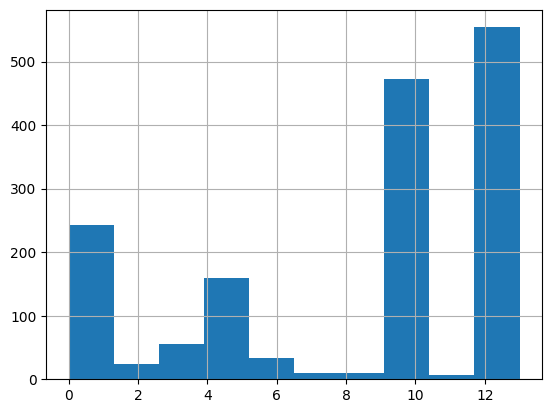

In [16]:
# Instead of using each tag, we will create a new column with the total number of tags per POI.
df_poi['number_tags'] = df_poi['tags'].apply(len)
df_poi.drop('tags', axis=1, inplace=True)
df_poi['number_tags'].hist()

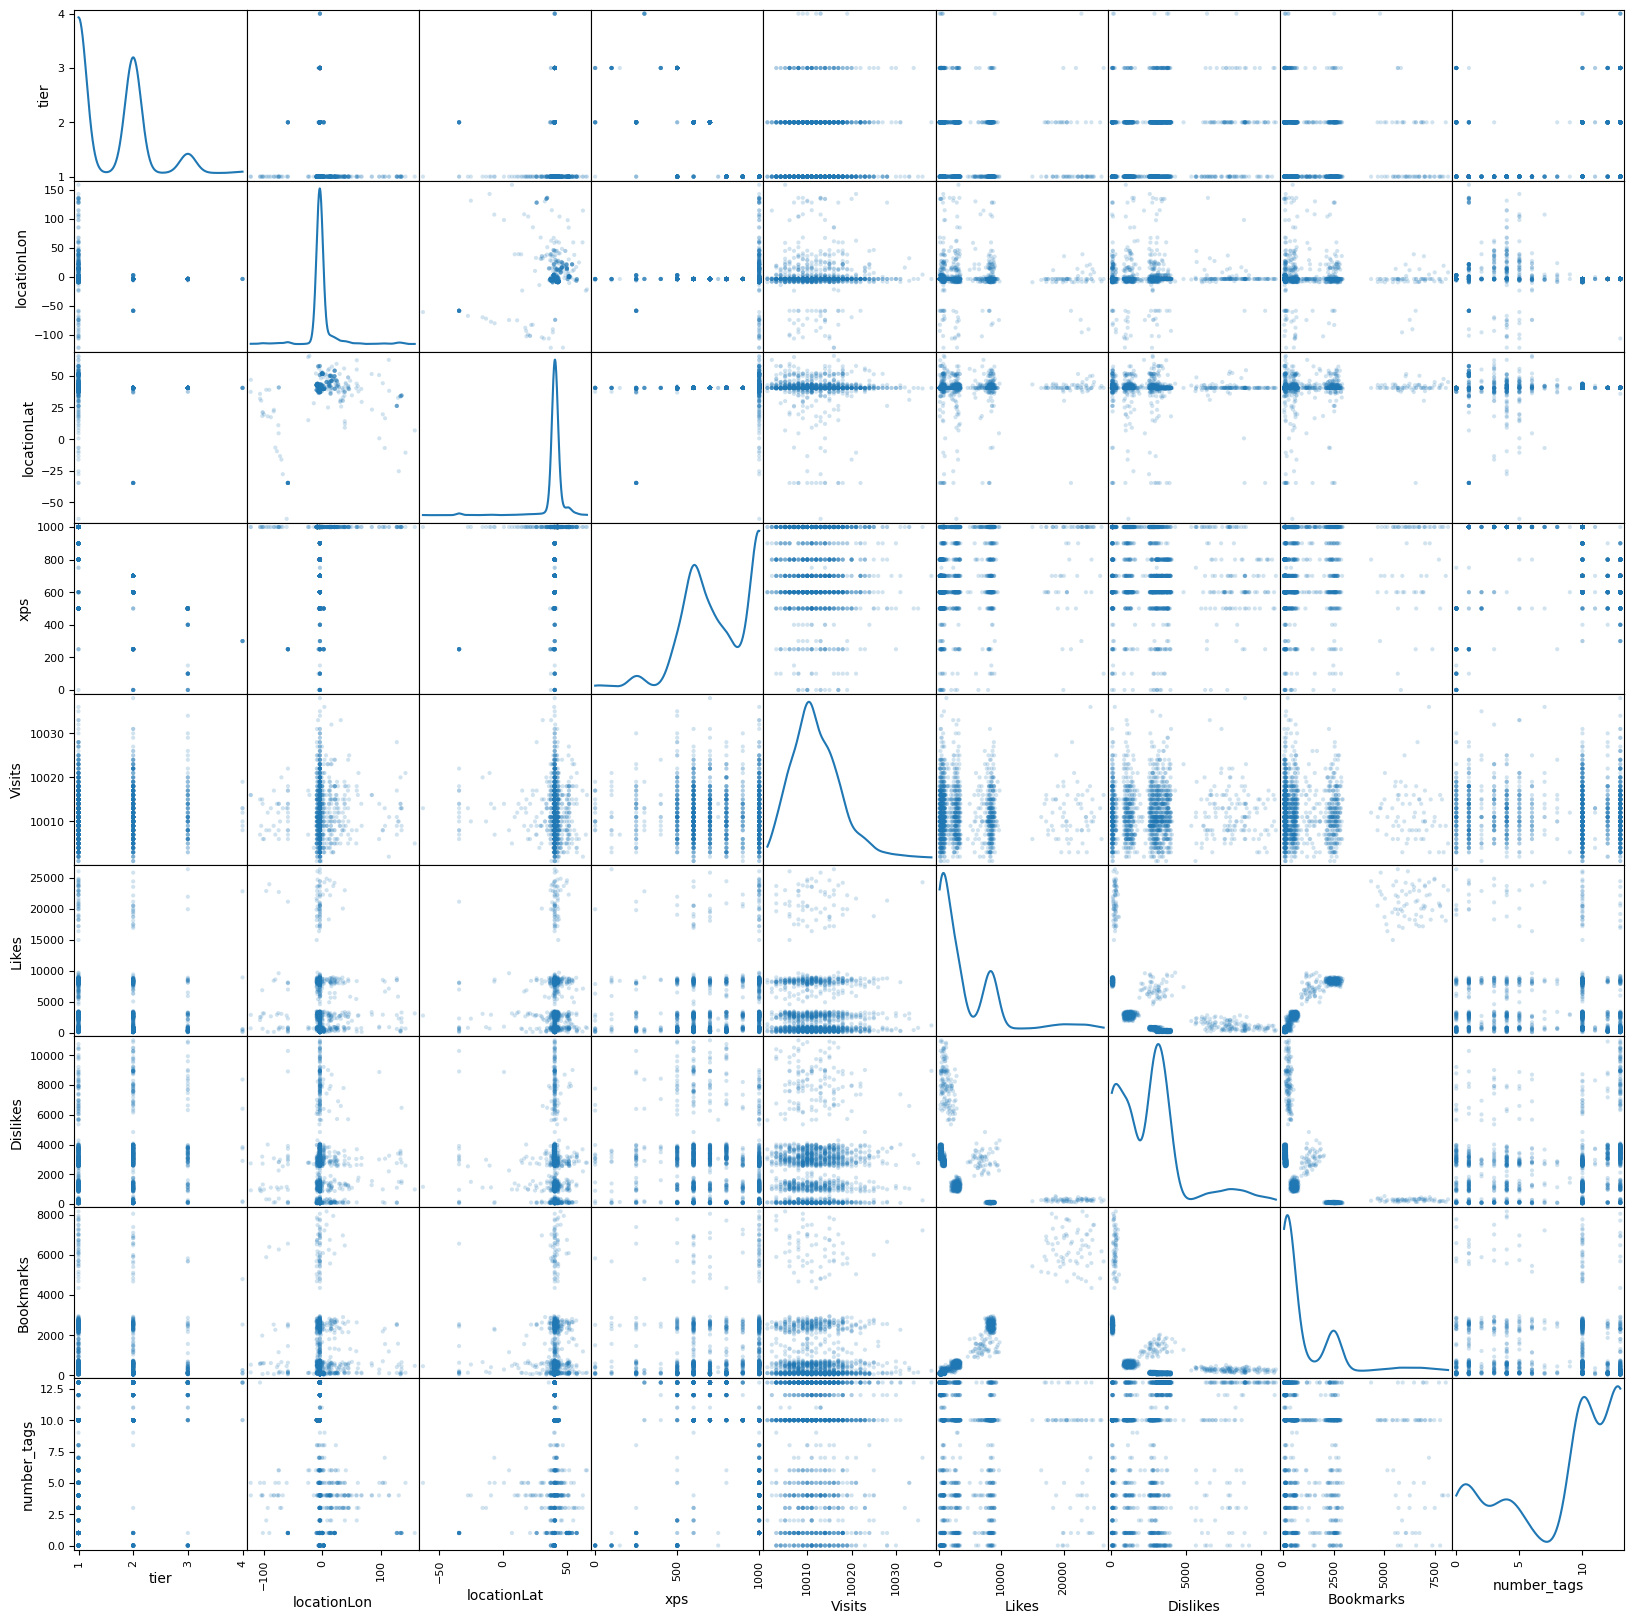

In [17]:
# Select the columns you want to plot as a list
columns_to_plot = ['tier', 'locationLon', 'locationLat', 'xps', 'Visits', 'Likes', 'Dislikes', 'Bookmarks', 'number_tags']

# Pass the sub-DataFrame with the selected columns to scatter_matrix
pd.plotting.scatter_matrix(df_poi[columns_to_plot], alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [18]:
numerical_columns = ['Visits', 'xps', 'tier', 'Likes', 'Dislikes', 'Bookmarks', 'number_tags']
numerical_df = df_poi[numerical_columns]
numerical_df.corr()

,Visits,xps,tier,Likes,Dislikes,Bookmarks,number_tags
Visits,1.000000,-0.005895,0.009010,-0.019961,0.014972,-0.023602,-0.043039
xps,-0.005895,1.000000,-0.761414,0.155575,-0.178567,0.131994,-0.113314
tier,0.009010,-0.761414,1.000000,-0.151130,0.197293,-0.137274,0.391474
Likes,-0.019961,0.155575,-0.151130,1.000000,-0.539695,0.971832,-0.161836
Dislikes,0.014972,-0.178567,0.197293,-0.539695,1.000000,-0.524314,0.216029
Bookmarks,-0.023602,0.131994,-0.137274,0.971832,-0.524314,1.000000,-0.148639
number_tags,-0.043039,-0.113314,0.391474,-0.161836,0.216029,-0.148639,1.000000


'Likes' and 'Bookmarks' are highly correlated, near 1.
'tier' and 'xps' also have relevant correlation between each other and Visits seems to have low correlation with all the other features.

<Axes: >

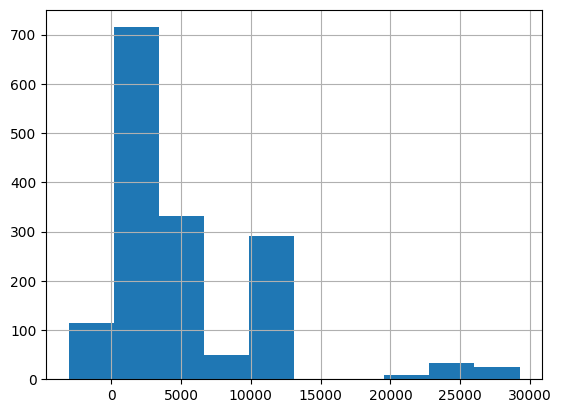

In [19]:
# First 'engagement' estimation
df_poi['engagement'] = 0.8 * df_poi['Likes'] +  df_poi['Bookmarks'] + 0.2* df_poi['Visits'] - 0.5 * df_poi['Dislikes']
df_poi['engagement'].hist()

In [97]:
engagement_scores = pd.qcut(df_poi['engagement'], q=3, labels=['Low', 'Medium', 'High'])
engagement_scores.value_counts()

,count
engagement,
Low,523
Medium,523
High,523


In [98]:
df_poi['engagement_score'] = engagement_scores

### Exploring images

In [20]:
df_poi['main_image_path'][0]

'data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03/main.jpg'

In [21]:
!ls '/content/drive/MyDrive/Bootcamp/Deep Learning/Proyecto/'


data_main  data_main.zip  EDA.ipynb  Enunciado_Práctica_DL.pdf	poi_dataset.csv


In [22]:
base_path = '/content/drive/MyDrive/Bootcamp/Deep Learning/Proyecto/'

# Change the path of images so they can be read in the drive
df_poi['main_image_path'] = base_path + df_poi['main_image_path']

# Comprobación de la primera imagen
import cv2
img_path = df_poi['main_image_path'][0]
print("Ruta completa:", img_path)

img = cv2.imread(img_path)

if img is None:
    print("❌ No se pudo leer la imagen.")
else:
    print("✅ Imagen cargada correctamente:", img.shape)


Ruta completa: /content/drive/MyDrive/Bootcamp/Deep Learning/Proyecto/data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03/main.jpg
✅ Imagen cargada correctamente: (128, 128, 3)


In [23]:
df_poi.main_image_path.apply(lambda x:cv2.imread(x).shape).value_counts()

KeyboardInterrupt: 

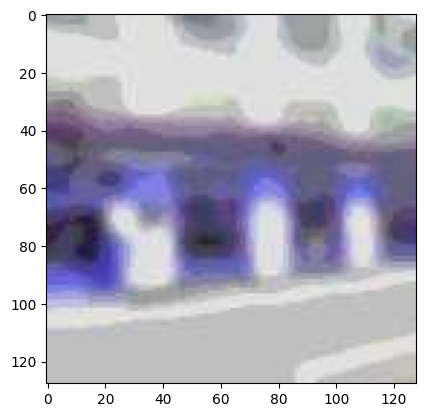

In [77]:
plt.imshow(cv2.imread(df_poi.main_image_path.iloc[random.randint(0, len(df_poi))]))

It seems like some of the pictures have some filter or modification in the colors and channels RGB.

## Summary

*   shortDescription won't be usefull for this model, since it would require NLP, not yet seen in class, Remove column
*   ID, I don't know if I have to keep it to access the image corralated, if not, eliminate.
*   Categories needs embedding and tags
* lon and lat? keep?
* maybe need to scale the values between columns.




In [93]:
df_poi.drop(columns=['id', 'name', 'shortDescription'], inplace=True)
df_poi.dtypes

,0
tier,int64
locationLon,float64
locationLat,float64
xps,int64
Visits,int64
Likes,int64
Dislikes,int64
Bookmarks,int64
main_image_path,object
Patrimonio,int64


In [ ]:
# Load img to tensors in Pytorch
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Imagen de una fila cualquiera
idx = df_poi[df_poi['has_image']].index[0]
img_path = os.path.join(base_dir, str(df_poi.loc[idx, 'id']), 'image.jpg')

img_tensor = transform(Image.open(img_path).convert('RGB'))
print(f"Tensor shape: {img_tensor.shape}")  # (C, H, W)

# Create the dataset custom


In [78]:
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def process_features(features):
  return features


In [86]:
class ds_poi(Dataset):
  """
  Class that facilitates dataset processing to load it into de DataLoader.
  it needs:
  - Initialize the dataset
  - get the length of the data set
  - obtain every item in the dataset
  """

  def __init__(self, target, image_path, features, transform=None):
    assert len(target) == len(image_path) == len(features)
    self.target = torch.tensor(target)

    # Preprocess features

    self.features = torch.tensor(features#process_features(features))
    self.image_path = image_path
    self.transform = transform

  def __len__(self):
    return len(self.features)


  def __getitem__(self, idx):

    target = self.target[idx]
    features = self.features[idx]
    im = cv2.imread(self.image_path[idx])
    if self.transform is not None:
      im = self.transform(im)

    return target, features, im

In [82]:
df_poi.columns


Index(['id', 'name', 'shortDescription', 'tier', 'locationLon', 'locationLat',
       'xps', 'Visits', 'Likes', 'Dislikes', 'Bookmarks', 'main_image_path',
       'Patrimonio', 'Ocio', 'Escultura', 'Arquitectura', 'Ciencia',
       'Gastronomía', 'Historia', 'Naturaleza', 'Misterio', 'Cultura', 'Cine',
       'Pintura', 'number_tags', 'engagement'],
      dtype='object')

In [87]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [94]:
dataset = ds_poi(target = df_poi['engagement'],
                 image_path = df_poi['main_image_path'],
                 features = df_poi.drop(columns=['Visits', 'Likes', 'Dislikes',
                                                 'Bookmarks', 'engagement', 'main_image_path', 'engagement_score']).values,
                 transform = transform)

In [95]:
target, features, im = dataset[0]
print(target, features, im.shape)

tensor(626.4000, dtype=torch.float64) tensor([  1.0000,   2.6423,  39.5727, 500.0000,   0.0000,   0.0000,   1.0000,
          0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
          0.0000,   1.0000,   0.0000], dtype=torch.float64) torch.Size([3, 128, 128])


In [100]:
#TODO: Scale these measurements
df_poi.engagement

,engagement
0,626.4
1,10934.4
2,4684.2
3,11167.9
4,1431.0
...,...
1564,10660.5
1565,1171.3
1566,1465.3
1567,5226.7


In [96]:
im

tensor([[[0.8863, 0.9059, 0.9255,  ..., 0.9490, 0.9490, 0.9490],
         [0.7490, 0.8941, 0.9843,  ..., 0.9529, 0.9529, 0.9529],
         [0.6627, 0.7961, 0.8863,  ..., 0.9569, 0.9569, 0.9569],
         ...,
         [0.8941, 0.8902, 0.8902,  ..., 1.0000, 1.0000, 1.0000],
         [0.8980, 0.8863, 0.8706,  ..., 1.0000, 1.0000, 1.0000],
         [0.8980, 0.8824, 0.8627,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.8745, 0.8941, 0.9137,  ..., 0.9333, 0.9333, 0.9333],
         [0.7373, 0.8824, 0.9725,  ..., 0.9373, 0.9373, 0.9373],
         [0.6510, 0.7843, 0.8745,  ..., 0.9412, 0.9412, 0.9412],
         ...,
         [0.9020, 0.8980, 0.8980,  ..., 0.9922, 0.9882, 0.9882],
         [0.9059, 0.8941, 0.8902,  ..., 0.9882, 0.9882, 0.9843],
         [0.9059, 0.8902, 0.8824,  ..., 0.9882, 0.9843, 0.9843]],

        [[0.8431, 0.8627, 0.8824,  ..., 0.9137, 0.9137, 0.9137],
         [0.7059, 0.8510, 0.9412,  ..., 0.9176, 0.9176, 0.9176],
         [0.6314, 0.7647, 0.8549,  ..., 0.9216, 0.9216, 0.

# Model

In [ ]:
class ModelTest(nn.Module):
  def__intit__(self, n_features):
    super(ModelTest, self).__init__()

    self.fc1 = nn.Linear(n_features, 1)
    pass
  def forward(self, features, im):
    x = self.fc1(features)

    # TODO process images

    x = torch.cat((x, conv), dim=1)

    # classifier
    return x

In [ ]:
import torch.optim as optim

model = ModelTest(len(features))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)